In [111]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
Liver_df = pd.read_csv('indian_liver_patient.csv')
print(Liver_df.shape)
Liver_df.head(10)

(583, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [113]:
print(Liver_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [114]:
print(Liver_df.isnull().sum())
print(Liver_df.Albumin_and_Globulin_Ratio.describe())
Liver_df.Albumin_and_Globulin_Ratio = Liver_df.Albumin_and_Globulin_Ratio.fillna(Liver_df['Albumin_and_Globulin_Ratio'].mean())
Liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64
count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: Albumin_and_Globulin_Ratio, dtype: float64


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [115]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
Liver_df["Gender"] = l.fit_transform(Liver_df["Gender"])
# Liver_df[Liver_df["Gender"]==1] # 441 male
# Liver_df[Liver_df["Gender"]==0] # 142 female

In [116]:
corr_mat = Liver_df.corr()
corr_mat["Dataset"]*100

Age                           -13.735063
Gender                         -8.241591
Total_Bilirubin               -22.020756
Direct_Bilirubin              -24.604634
Alkaline_Phosphotase          -18.486561
Alamine_Aminotransferase      -16.341616
Aspartate_Aminotransferase    -15.193375
Total_Protiens                  3.500824
Albumin                        16.138782
Albumin_and_Globulin_Ratio     16.231913
Dataset                       100.000000
Name: Dataset, dtype: float64

<Axes: >

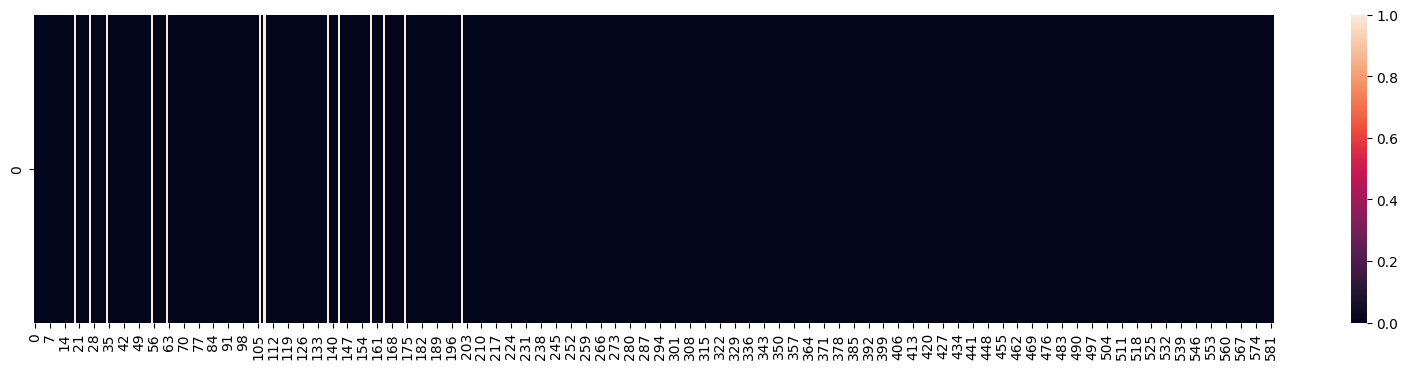

In [117]:
# let's drop duplicate rows
dp = Liver_df.duplicated() #  13 duplicate rows 
plt.figure(figsize=(20,4))
sns.heatmap([dp])


<Axes: >

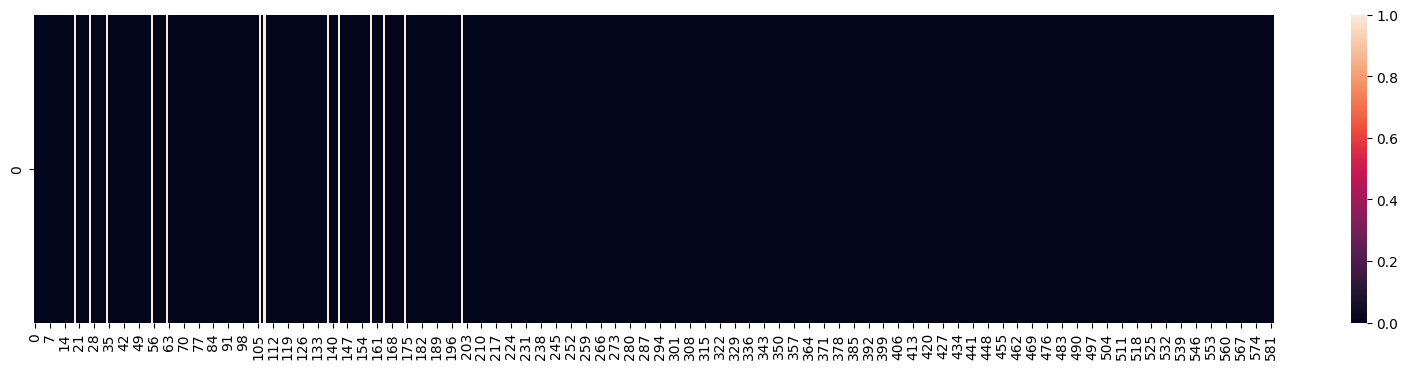

In [118]:
# let's drop duplicate rows
dp = Liver_df.duplicated()
plt.figure(figsize=(20,4))
sns.heatmap([dp])

In [119]:
Liver_df = Liver_df.drop_duplicates()
Liver_df.shape #583-13 == 570

(570, 11)

In [120]:
Liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [121]:
X = Liver_df.drop(["Dataset","Direct_Bilirubin","Alkaline_Phosphotase"], axis=1)
y= Liver_df["Dataset"]
print(len(X),len(y))

570 570


In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state= 42)
print(len(X_train),len(X_test))

456 114


In [123]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [124]:
model.score(X_test,y_test)*100 # before tuning 76.31578947368422%

77.19298245614034

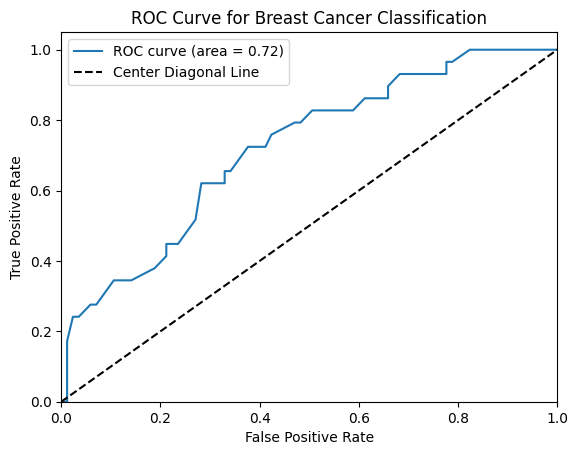

In [141]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(X_test)[::,1]

y_test_binary = np.where(y_test == 2, 1, 0)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Center Diagonal Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()


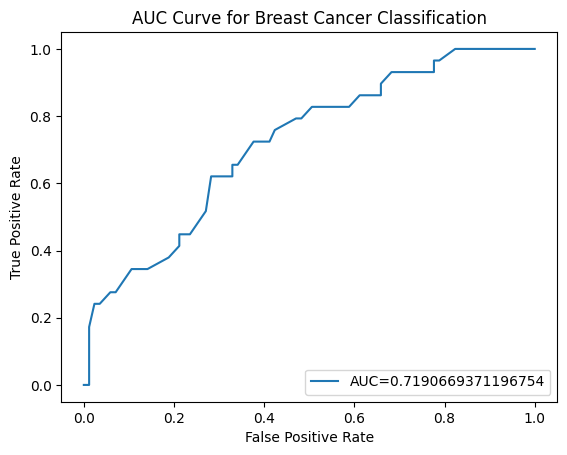

In [142]:
### AUC curve
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC Curve for Breast Cancer Classification')
plt.legend(loc=4)
plt.show()

In [143]:
y_pred = model.predict(X_test)
print(y_pred)

from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
cm = confusion_matrix(y_test, y_pred)
cm

[1 1 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 1 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1
 2 1 2]


array([[75, 10],
       [19, 10]], dtype=int64)

              precision    recall  f1-score   support

           1       0.80      0.88      0.84        85
           2       0.50      0.34      0.41        29

    accuracy                           0.75       114
   macro avg       0.65      0.61      0.62       114
weighted avg       0.72      0.75      0.73       114



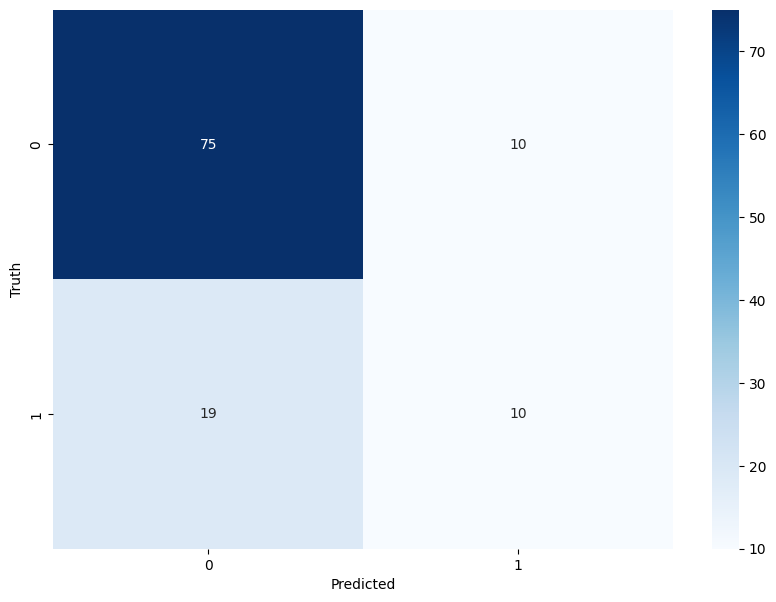

In [144]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test, y_pred))

In [145]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mae => ', mae)
print('mse => ', mse)
print('rmse => ', rmse)

mae =>  0.2543859649122807
mse =>  0.2543859649122807
rmse =>  0.5043668951391246


In [125]:
# Score = {}
# n_estimators = [10,20,30,50,75]
# criterion = ['gini', 'entropy', 'log_loss']
# max_features = ['sqrt', 'log2']
# for n in n_estimators:
#     for c in criterion:
#         for mf in max_features:
#             model = RandomForestClassifier(n_estimators=n,criterion=c,max_features=mf)
#             model.fit(X_train,y_train)
#             acc = model.score(X_test,y_test)*100
#             Score[n,c,mf] = acc
            
# max(Score.values())
# tunedVal = max(Score,key=Score.get)
# tunedVal,max(Score.values())

((20, 'gini', 'sqrt'), 78.0701754385965)

In [129]:
# mdl = RandomForestClassifier(n_estimators=20,criterion="gini", max_features="sqrt")
# mdl.fit(X_train,y_train)
# mdl.score(X_test,y_test)*100 # after tuning 75.43859649122807

73.68421052631578